In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [9]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

start = dt.datetime(2010,1,1)
end = dt.datetime(2022,12,31)
df = web.get_data_yahoo('TSLA', start, end)
print(df.head())

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [11]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [12]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


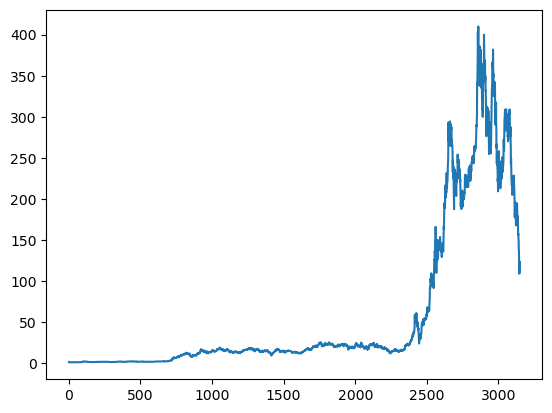

In [13]:
plt.plot(df.Close)

In [14]:
df


,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3145,126.370003,128.619995,121.019997,123.150002,166989700
3146,117.500000,119.669998,108.760002,109.099998,208643400
3147,110.349998,116.269997,108.239998,112.709999,221070500
3148,120.389999,123.570000,117.500000,121.820000,221923300


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    234.019467
3146    232.024134
3147    230.269534
3148    228.583501
3149    226.981967
Name: Close, Length: 3150, dtype: float64

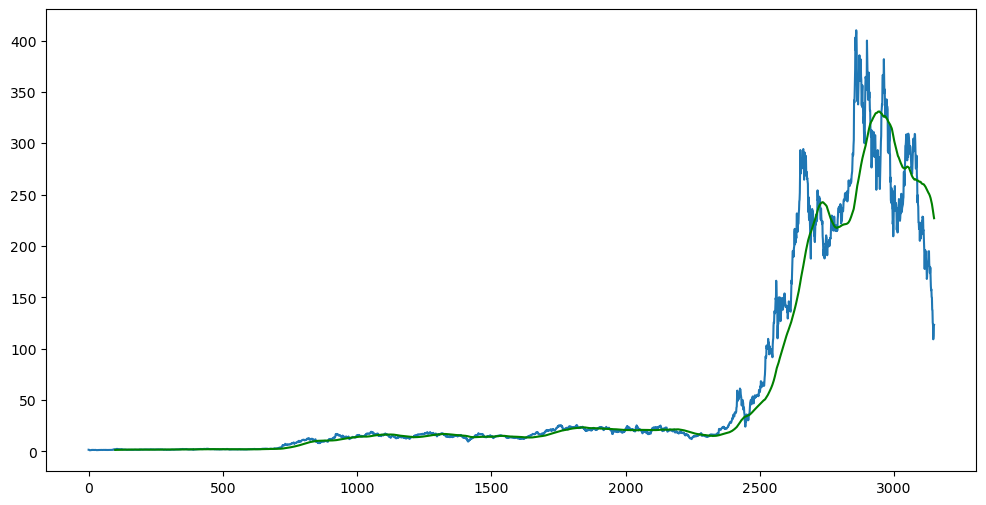

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'g')

In [26]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    255.097317
3146    254.317234
3147    253.603501
3148    252.876117
3149    252.091634
Name: Close, Length: 3150, dtype: float64

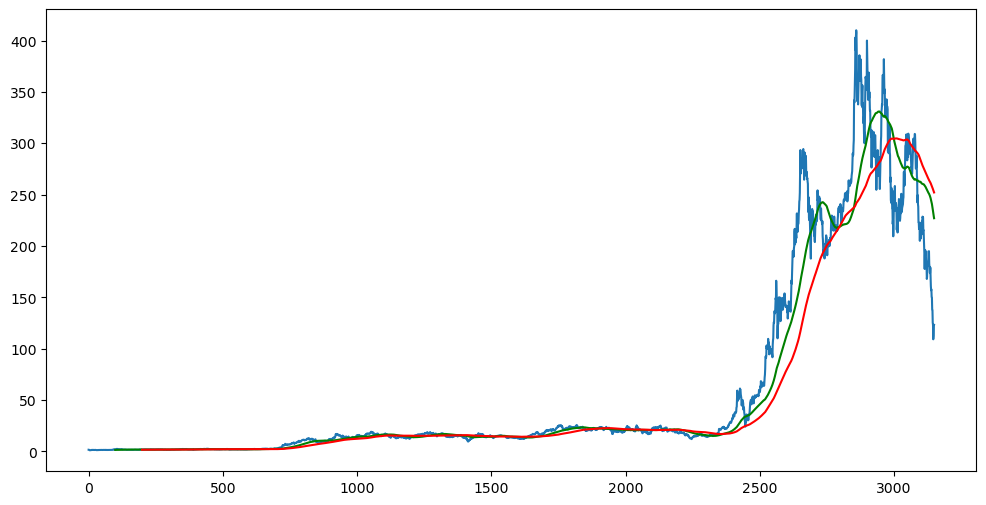

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [28]:
df.shape

(3150, 5)

In [32]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2205, 1)
(945, 1)


In [33]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [34]:
data_testing.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
data_training_array.shape

(2205, 1)

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 120)              

In [52]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
66/66 [==============================] - 73s 1s/step - loss: 0.0438
Epoch 2/50
66/66 [==============================] - 38s 577ms/step - loss: 0.0107
Epoch 3/50
66/66 [==============================] - 37s 563ms/step - loss: 0.0110
Epoch 4/50
66/66 [==============================] - 56s 846ms/step - loss: 0.0093
Epoch 5/50
66/66 [==============================] - 48s 725ms/step - loss: 0.0088
Epoch 6/50
66/66 [==============================] - 38s 573ms/step - loss: 0.0085
Epoch 7/50
66/66 [==============================] - 40s 603ms/step - loss: 0.0079
Epoch 8/50
66/66 [==============================] - 40s 606ms/step - loss: 0.0076
Epoch 9/50
66/66 [==============================] - 39s 587ms/step - loss: 0.0074
Epoch 10/50
66/66 [==============================] - 34s 512ms/step - loss: 0.0074
Epoch 11/50
66/66 [==============================] - 36s 545ms/step - loss: 0.0073
Epoch 12/50
66/66 [==============================] - 37s 557ms/step - loss: 0.0079
Epoch 13/50
66/6

In [54]:
model.save('keras_model.h5')

In [55]:
data_testing.head()

,Close
2205,19.454000
2206,17.851999
2207,18.330667
2208,18.213333
2209,18.153999


In [56]:
data_training.tail()

,Close
2200,18.322001
2201,18.574667
2202,18.657333
2203,19.278667
2204,19.058666


In [57]:
past_100_days = data_training.tail(100)

In [60]:
final_df= past_100_days.append(data_testing, ignore_index = True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17548\980448860.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index = True)


In [62]:
final_df.head()

,Close
0,22.737333
1,23.210667
2,23.426666
3,23.367332
4,22.085333


In [63]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.02714812],
       [0.02833728],
       [0.02887994],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

In [64]:
input_data.shape

(1045, 1)

In [65]:
x_test = []
y_test= []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [66]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [67]:
y_predicted = model.predict(x_test)

30/30 [==============================] - 3s 76ms/step


In [68]:
y_predicted.shape

(945, 1)

In [69]:
y_test


array([0.01889934, 0.0148746 , 0.01607717, 0.01578239, 0.01563332,
       0.0162614 , 0.0149818 , 0.0148612 , 0.01464012, 0.01580919,
       0.01545244, 0.01579244, 0.01403214, 0.01422475, 0.01334711,
       0.01149972, 0.0094078 , 0.010468  , 0.01000238, 0.00921854,
       0.01090849, 0.01273913, 0.01279105, 0.01140425, 0.01103243,
       0.01055342, 0.0101414 , 0.00804612, 0.00893381, 0.00887351,
       0.00826721, 0.00536967, 0.00442001, 0.00437311, 0.00230464,
       0.0027669 , 0.00195291, 0.00162966, 0.00182395, 0.00154927,
       0.00103675, 0.        , 0.00245035, 0.00295114, 0.00451882,
       0.00427597, 0.00567952, 0.00638632, 0.00507321, 0.00585203,
       0.00602119, 0.00771449, 0.00766592, 0.00794898, 0.00680838,
       0.00718356, 0.00748169, 0.00683184, 0.00674976, 0.0073477 ,
       0.00745154, 0.00807292, 0.0076341 , 0.0093676 , 0.00906612,
       0.00860386, 0.00855696, 0.0100409 , 0.00998731, 0.01107263,
       0.01248288, 0.01229529, 0.01271066, 0.01248957, 0.01326

In [70]:
y_predicted


array([[0.03948879],
       [0.03942855],
       [0.03939334],
       [0.03938313],
       [0.03939618],
       [0.03942877],
       [0.03947592],
       [0.03953291],
       [0.03959411],
       [0.03965382],
       [0.0397065 ],
       [0.03974858],
       [0.03977787],
       [0.03979404],
       [0.03979632],
       [0.03978443],
       [0.03975828],
       [0.03971666],
       [0.03965601],
       [0.0395738 ],
       [0.03946848],
       [0.0393389 ],
       [0.03918651],
       [0.03901696],
       [0.03883845],
       [0.03865895],
       [0.03848563],
       [0.03832416],
       [0.03817874],
       [0.03804991],
       [0.03793703],
       [0.0378387 ],
       [0.03775354],
       [0.03767705],
       [0.03760324],
       [0.03752621],
       [0.03743893],
       [0.03733587],
       [0.03721283],
       [0.03706741],
       [0.03689985],
       [0.03671226],
       [0.03650846],
       [0.03629161],
       [0.03606783],
       [0.0358443 ],
       [0.03563052],
       [0.035

In [72]:
scaler.scale_

array([0.00251232])

In [75]:
scale_factor = 1/0.00251232
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

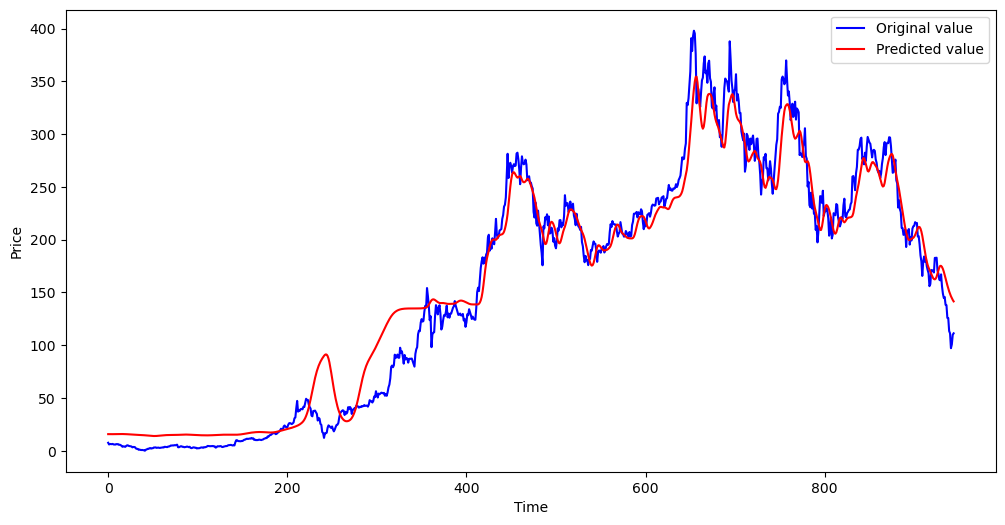

In [76]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original value')
plt.plot(y_predicted, 'r', label = 'Predicted value')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()